In [73]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="darkgrid")

In [53]:
df = pd.read_csv('data/Pokemon.csv')

### Conhecendo os atributos do dataset

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [55]:
print("Tipo 1:", df['Type 1'].unique())
print("Tipo 2:", df['Type 2'].unique())

Tipo 1: ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
Tipo 2: ['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']


In [56]:
df.groupby('Type 1').count()
#df['Type 1'].value_counts()

,#,Name,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,,,
Bug,69,69,52,69,69,69,69,69,69,69,69,69
Dark,31,31,21,31,31,31,31,31,31,31,31,31
Dragon,32,32,21,32,32,32,32,32,32,32,32,32
Electric,44,44,17,44,44,44,44,44,44,44,44,44
Fairy,17,17,2,17,17,17,17,17,17,17,17,17
Fighting,27,27,7,27,27,27,27,27,27,27,27,27
Fire,52,52,24,52,52,52,52,52,52,52,52,52
Flying,4,4,2,4,4,4,4,4,4,4,4,4
Ghost,32,32,22,32,32,32,32,32,32,32,32,32


/home/cflavs/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


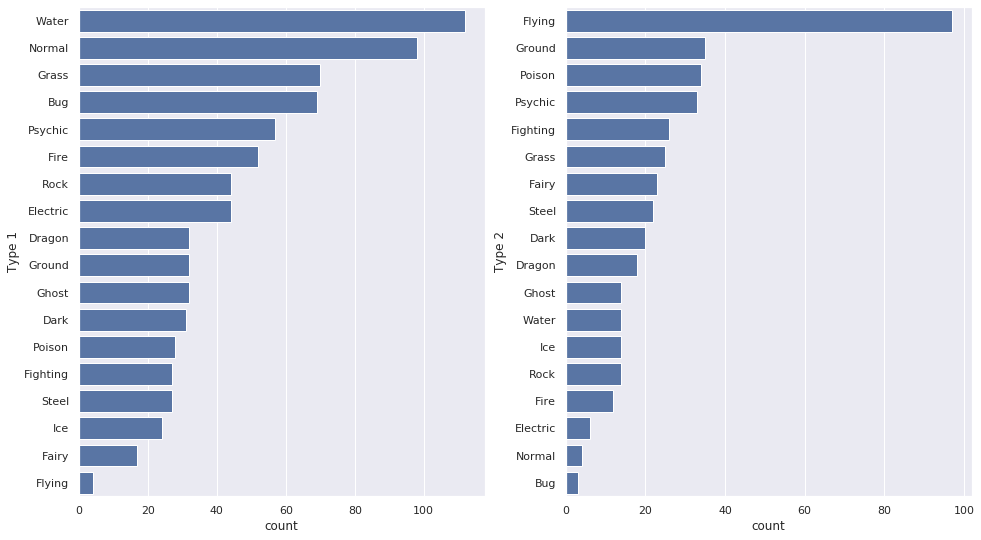

In [121]:
#fig, ax =plt.subplots(1,2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,9))
sns.countplot(y="Type 1", color="b",data=df,ax=ax[0],order = df['Type 1'].value_counts().index)
sns.countplot(y="Type 2", color="b",data=df,ax=ax[1],order = df['Type 2'].value_counts().index)
fig.show()

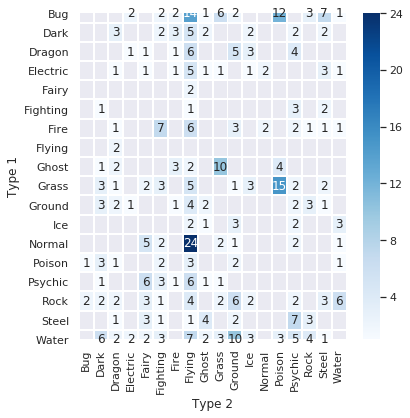

In [153]:
plt.subplots(figsize=(6, 6))
sns.heatmap(
    df[df['Type 2']!='None'].groupby(['Type 1', 'Type 2']).size().unstack(),
    linewidths=1,
    annot=True,
    cmap="Blues"
)
plt.show()



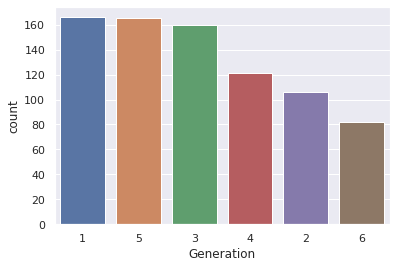

In [125]:
 ax = sns.countplot(x="Generation", data=df,order=df['Generation'].value_counts().index)

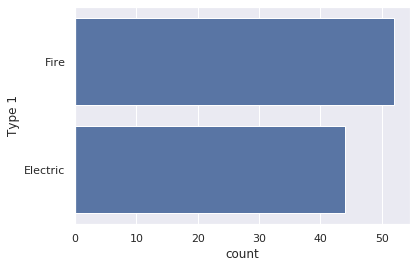

In [107]:
#filtering pokemons using logical operators
df_filter = df[((df['Type 1']=='Fire') | (df['Type 1']=='Electric'))]
sns.countplot(y="Type 1", color="b",data=df_filter)

In [115]:
df.Legendary.replace({True:1,False:0},inplace=True)

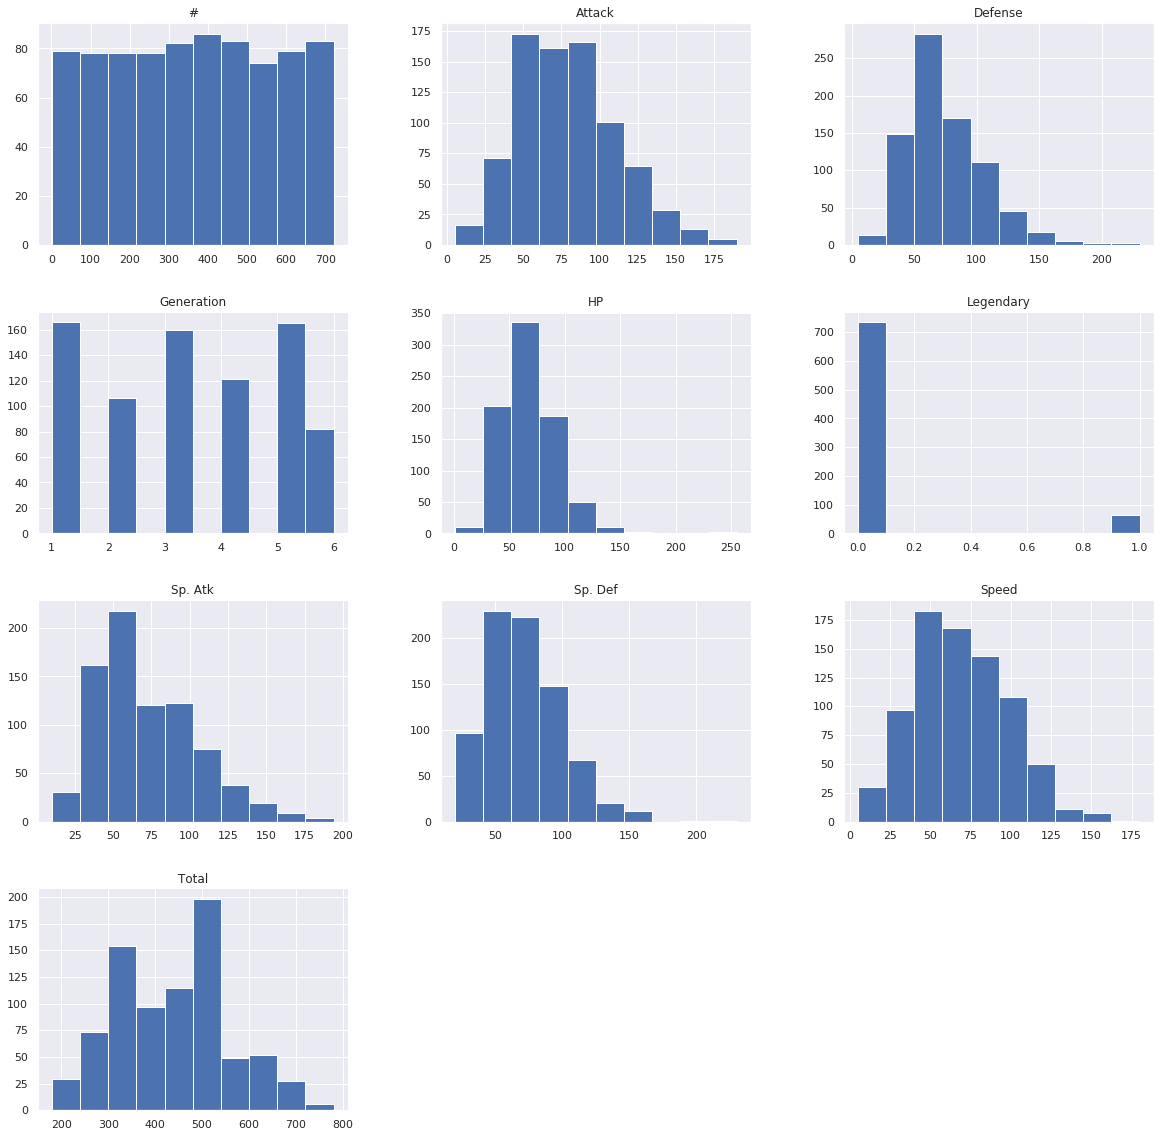

In [118]:
plot = df.hist(figsize = (20,20))

/home/cflavs/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:88: UserWarning: The handle <matplotlib.patches.Patch object at 0x7ff3f3b66898> has a label of '_nolegend_' which cannot be automatically added to the legend.
  **kwargs)


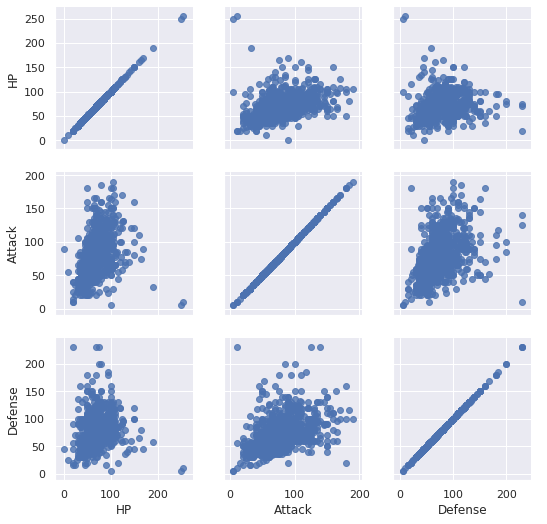

In [111]:
g = sns.PairGrid(df, vars=['HP', 'Attack', 'Defense'],
                  palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();



Text(0.5, 0.98, 'Pokémons lendários')

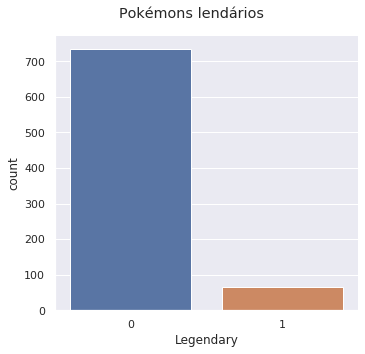

In [149]:
g = sns.catplot(x="Legendary",
                 data=df, kind="count")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Pokémons lendários')

In [183]:
labels=np.array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
stats=df.loc[df[df['Name']=="Pikachu"].index.item(),labels].values

In [184]:
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False) 
stats=np.concatenate((stats,[stats[0]]))  
angles=np.concatenate((angles,[angles[0]]))  

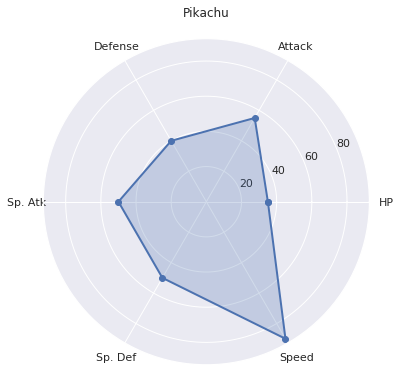

In [185]:
fig=plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, polar=True)   
ax.plot(angles, stats, 'o-', linewidth=2)  
ax.fill(angles, stats, alpha=0.25) 
ax.set_thetagrids(angles * 180/np.pi, labels)  
ax.set_title("Pikachu")  
ax.grid(True)